<a href="https://colab.research.google.com/github/ocean5apphotmail/AiLearning/blob/master/Deep_Learning_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <font color = 'silver'>第2章 感知机</font>



图2-1是一个接收两个输入信号的感知机的例子。x1、x2是输入信号，
y是输出信号，w1、w2是权重（w是weight的首字母）。图中的○称为“神
经元”或者“节点”。输入信号被送往神经元时，会被分别乘以固定的权重
（w1x1、w2x2）。神经元会计算传送过来的信号的总和，只有当这个总和超过
了某个界限值时，才会输出1。这也称为“神经元被激活”。这里将这个界
限值称为阈值，用符号θ表示

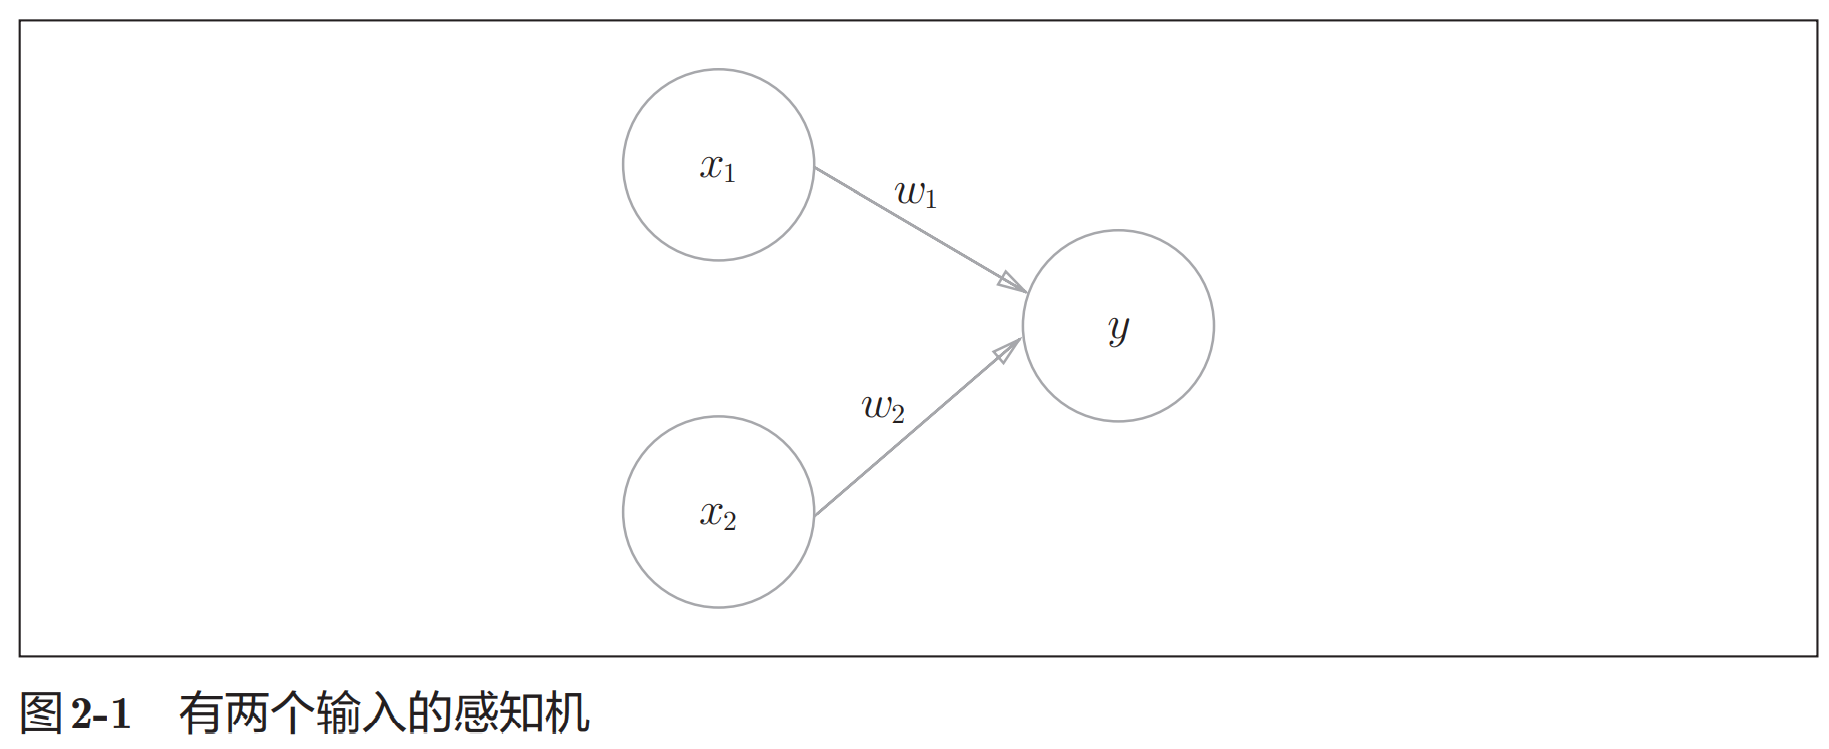


<font size = 14>1. y = 0 (w1x1 + w2x2 <= θ)</font>

<font size = 14>2. y = 1 (w1x1 + w2x2 > θ) </font>

## <font color = 'silver'>2.2 简单逻辑电路</font>
#### <font color = 'silver'>2.2.1　与门</font>


| X1 | X2 | Y |
| ------ | ------ | ------ |
| 0 | 0 | 0 |
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 1 | 1 |
图2-2

满足图2-2的条件的参数的选择方法有无数多个。比如，当
(w1, w2, θ) = (0.5, 0.5, 0.7) 时，可以满足图 2-2 的条件。此外，当 (w1, w2, θ)
为(0.5, 0.5, 0.8)或者(1.0, 1.0, 1.0)时，同样也满足与门的条件。设定这样的
参数后，仅当x1和x2同时为1时，信号的加权总和才会超过给定的阈值θ。

#### <font color = 'silver'>2.2.2　与非门和或门</font>

NAND是Not AND的意思，与非门就是颠倒了与门的输出。

要表示与非门，可以用(w1, w2, θ) = (−0.5, −0.5, −0.7)这样的组合（其
他的组合也是无限存在的）。实际上，只要把实现与门的参数值的符号取反，
就可以实现与非门

| X1 | X2 | Y |
| ------ | ------ | ------ |
| 0 | 0 | 1 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 0 |
图2-3 与非门的真值表

或门是“只要有一个输入信号是1，输出就为1”的逻辑电路。

| X1 | X2 | Y |
| ------ | ------ | ------ |
| 0 | 0 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 1 |
图2-4 或门的真值表

## <font color = 'silver'>2.3 感知机的实现</font>
#### <font color = 'silver'>2.3.1　简单的实现</font>



In [2]:
# 与门
import numpy as np


def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = AND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


这里把−θ命名为偏置b，但是请注意，偏置和权重w1、w2的作用是不
一样的。具体地说，w1和w2是控制输入信号的重要性的参数，而偏置是调
整神经元被激活的容易程度（输出信号为1的程度）的参数。比如，若b为
−0.1，则只要输入信号的加权总和超过0.1，神经元就会被激活。但是如果b
为−20.0，则输入信号的加权总和必须超过20.0，神经元才会被激活。像这样，
偏置的值决定了神经元被激活的容易程度。另外，这里我们将w1和w2称为权重，
将b称为偏置，但是根据上下文，有时也会将b、w1、w2这些参数统称为权重。

In [3]:
# 与非门
import numpy as np


def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = NAND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


In [4]:
# 或门
import numpy as np


def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = OR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


## <font color = 'silver'>2.4 感知机的局限性</font>
#### <font color = 'silver'>2.4.1　异或门</font>


异或门也被称为逻辑异或电路。如图2-5所示，仅当x1或x2中的一方为
1时，才会输出1（“异或”是拒绝其他的意思）。那么，要用感知机实现这个
异或门的话，应该设定什么样的权重参数呢？

| X1 | X2 | Y |
| ------ | ------ | ------ |
| 0 | 0 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 1 | 1 | 0 |
图2-5　异或门的真值表

异或门的制作方法有很多，其中之一就是组合我们前面做好的与门、与
非门、或门进行配置。这里，与门、与非门、或门用图2-9中的符号表示。另外，
图2-9中与非门前端的○表示反转输出的意思。

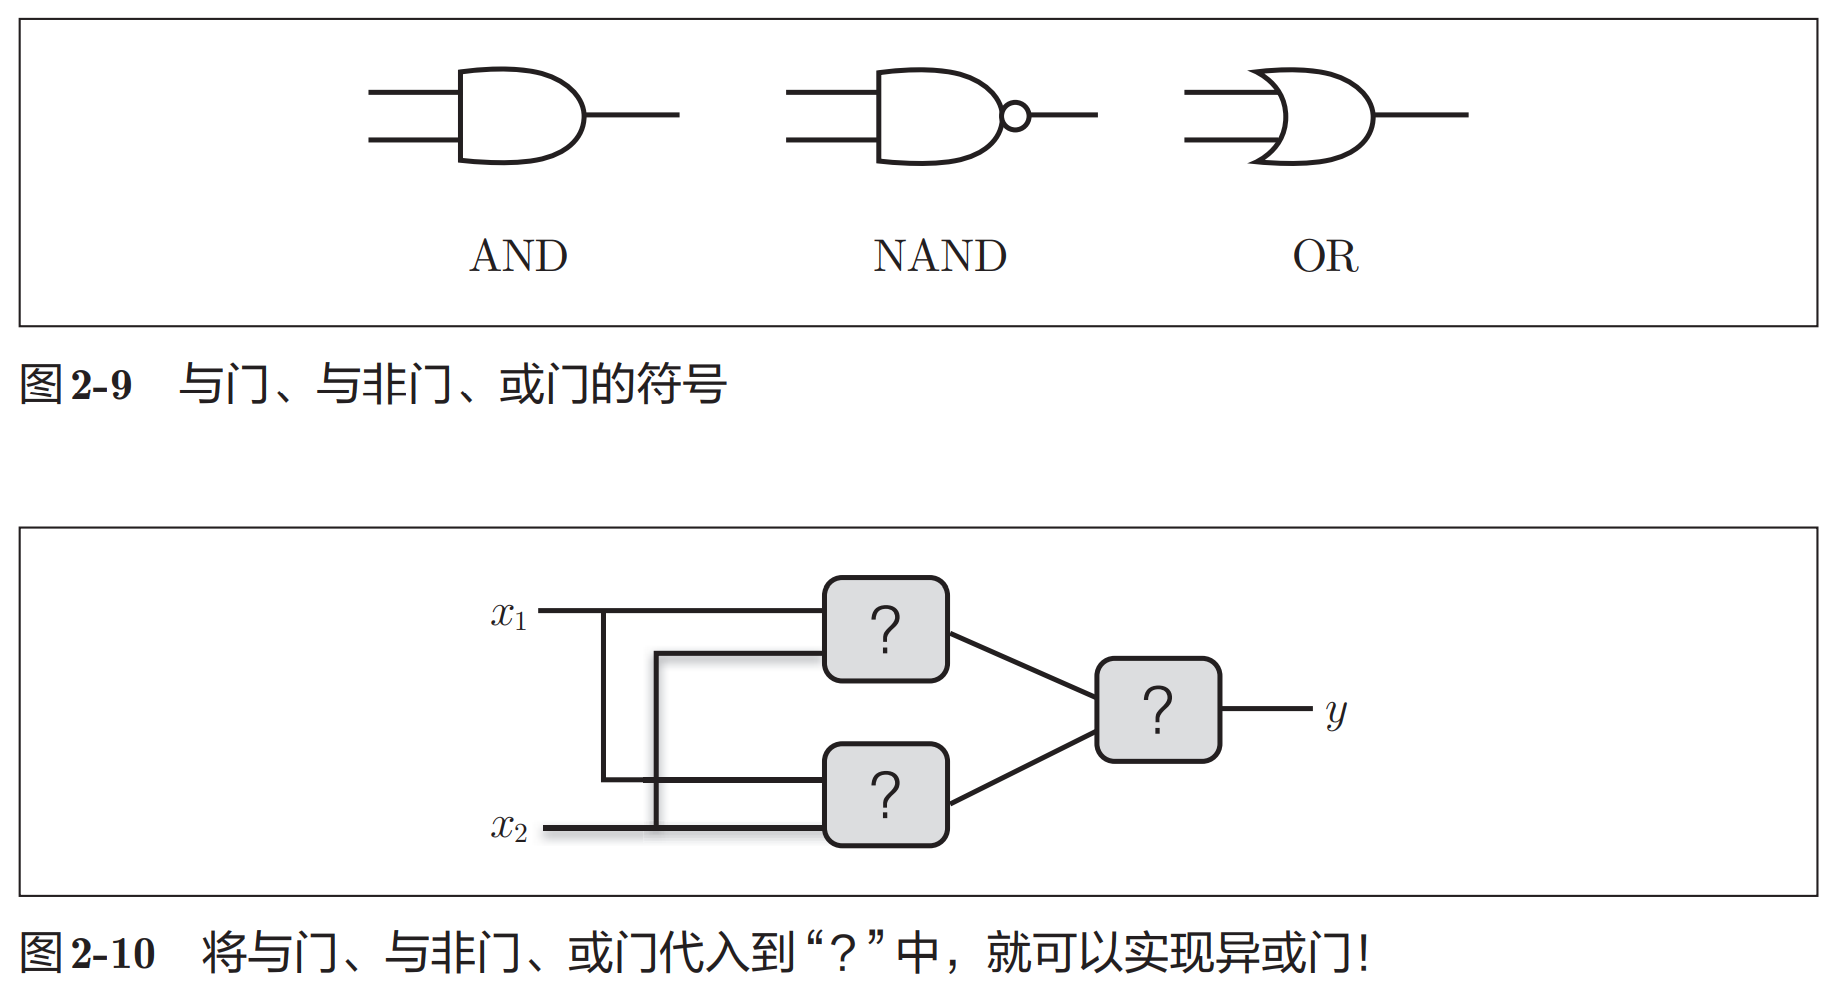

异或门可以通过图2-11所示的配置来实现。这里，x1和x2表示输入信号，
y表示输出信号。x1和x2是与非门和或门的输入，而与非门和或门的输出则
是与门的输入。

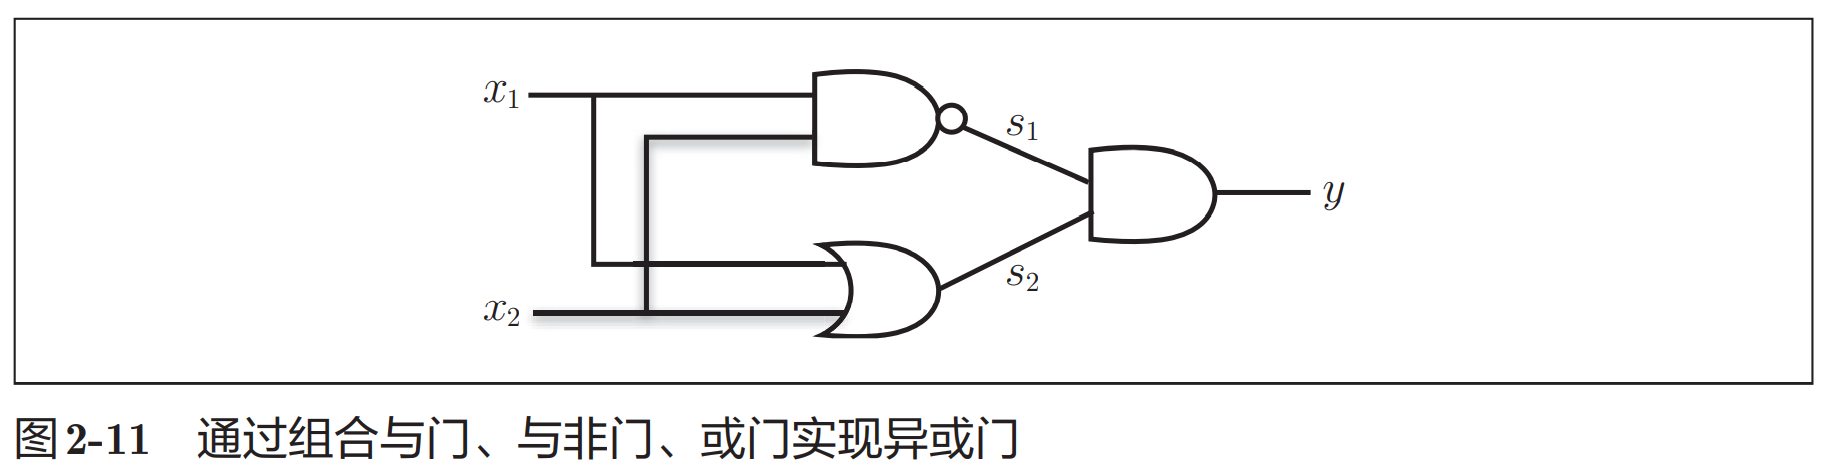

| X1 | X2 | S1 | S2 | Y |
| ------ | ------ | ------ | ------ | ------ |
| 0 | 0 | 1 | 0 | 0 |
| 1 | 0 | 1 | 1 | 1 |
| 0 | 1 | 1 | 1 | 1 |
| 1 | 1 | 0 | 1 | 0 |
图2-12　异或门的真值表

In [5]:
# 异或门

def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


# <font color = 'silver'>第3章 神经网络</font>

#### <font color = 'silver'>3.1.3　激活函数登场</font>


h（x）函数会将输入信号的总和转换为输出信号，这种函数
一般称为激活函数（activation function）。如“激活”一词所示，激活函数的
作用在于决定如何来激活输入信号的总和

<font size = 14>1. a = b + w1x1 + w2x2 （3.4）</font>

<font size = 14>2. y = h(a) （3.5） </font>

式（3.4）计算加权输入信号和偏置的总和，记为a。然后，式（3.5）
用h()函数将a转换为输出y。


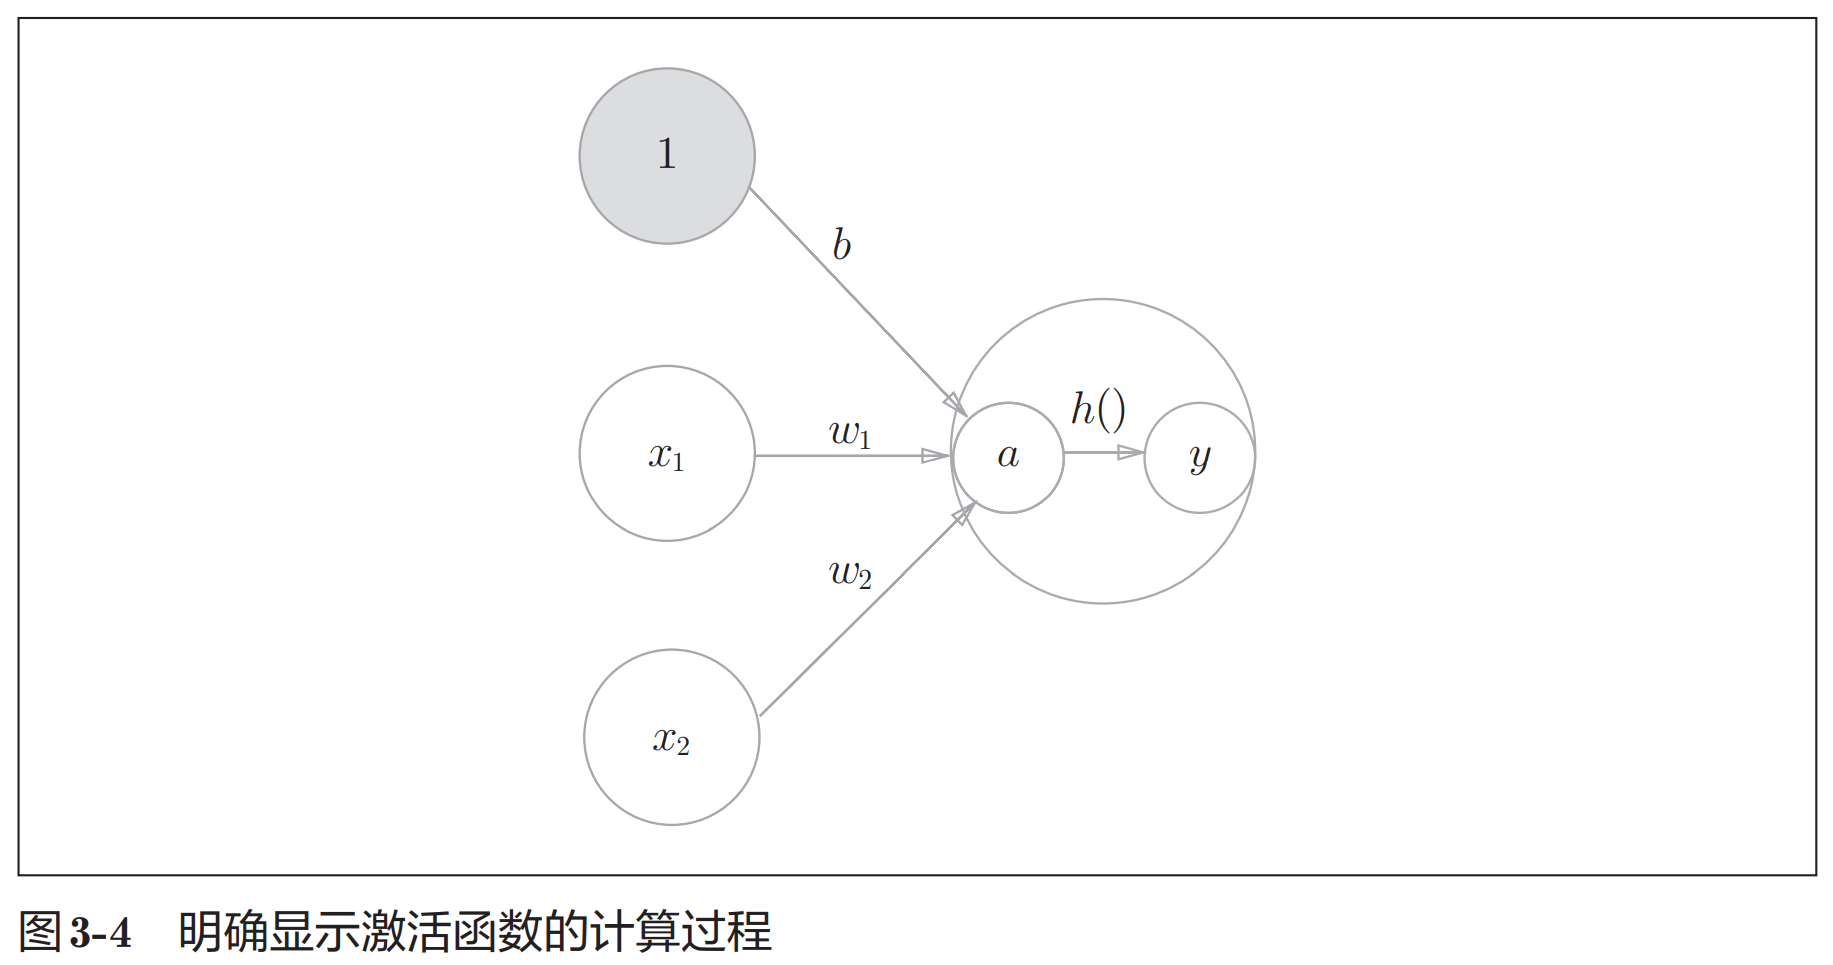

#### <font color = 'silver'>3.2 激活函数</font>

激活函数以阈值为界，一旦输入超过阈值，就切换输出。
这样的函数称为“阶跃函数”。因此，可以说<font color=red>感知机中使用了阶跃函数作为
激活函数</font>。也就是说，在激活函数的众多候选函数中，感知机使用了阶跃函数。
那么，如果感知机使用其他函数作为激活函数的话会怎么样呢？实际上，如
果将激活函数从阶跃函数换成其他函数，就可以进入神经网络的世界了。下
面我们就来介绍一下神经网络使用的激活函数。
<font color=red>感知机和接下来要介绍的神经网络的主要区别就在于这个激活函数</font>

#### <font color = 'silver'>3.2.1　sigmoid函数</font>

神经网络中经常使用的一个激活函数就是式（3.6）表示的sigmoid函数
（sigmoid function）

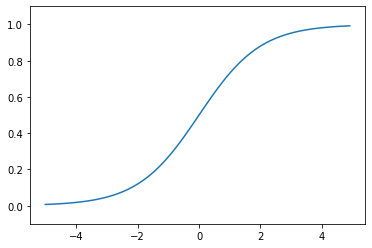

In [6]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

#### <font color = 'silver'>3.2.2　阶跃函数的实现</font>

可以用astype()方法转换NumPy数组的类型。astype()方
法通过参数指定期望的类型，这个例子中是np.int型。Python中将布尔型
转换为int型后，True会转换为1，False会转换为0。以上就是阶跃函数的
实现中所用到的NumPy的“技巧”。

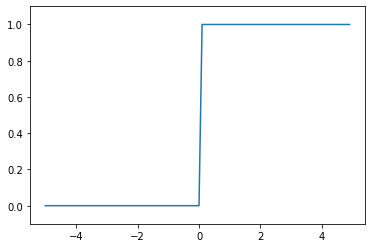

In [7]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=np.int)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # 指定图中绘制的y轴的范围
plt.show()

#### <font color = 'silver'>3.2.5　sigmoid函数和阶跃函数的比较</font>

如果把这两个函数与水联系起来，则阶跃函数可以比作“竹筒敲石”A，
sigmoid函数可以比作“水车”。阶跃函数就像竹筒敲石一样，只做是否传送
水（0或1）两个动作，而sigmoid函数就像水车一样，根据流过来的水量相应
地调整传送出去的水量。

接着说一下阶跃函数和sigmoid函数的共同性质。阶跃函数和sigmoid
函数虽然在平滑性上有差异，但是如果从宏观视角看图3-8，可以发现它们
具有相似的形状。实际上，两者的结构均是“输入小时，输出接近0（为0）；
随着输入增大，输出向1靠近（变成1）”。也就是说，当输入信号为重要信息时，
阶跃函数和sigmoid函数都会输出较大的值；当输入信号为不重要的信息时，
两者都输出较小的值。还有一个共同点是，不管输入信号有多小，或者有多
大，输出信号的值都在0到1之间。

<font color=red>神经网络的激活函数必须使用非线性函数</font>。换句话说，激活函数不能使
用线性函数。为什么不能使用线性函数呢？因为使用线性函数的话，加深神
经网络的层数就没有意义了。

#### <font color = 'silver'>ReLU函数</font>

sigmoid函数很早就开始被使用了，而最近则主要
使用ReLU（Rectified Linear Unit）函数。
ReLU函数在输入大于0时，直接输出该值；在输入小于等于0时，输
出0（图3-9）

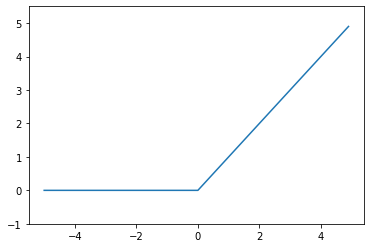

In [8]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()